In [1]:
# load required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
%matplotlib inline

from skimage.measure import compare_ssim
from sklearn.model_selection import train_test_split

# load required functionality from keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, AveragePooling2D
from keras.models import Model
from keras.layers import Lambda
from keras.layers import Input
from keras.layers import UpSampling2D
from keras.layers import concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation
from keras.layers import Add, Subtract
from keras.callbacks import ModelCheckpoint, EarlyStopping, History 
from keras.optimizers import RMSprop, Adadelta, Adam
from keras.utils import np_utils
from keras import backend as keras_backend


from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
keras_backend.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15948394866809238678
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6700198133
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12674837788211809508
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:06:00.0, compute capability: 6.1"
]


['/job:localhost/replica:0/task:0/device:GPU:0']

(2040, 1356, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1524, 2040, 3)
(512, 512)
(512, 512)
(1644, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1368, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1368, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(1392, 2040, 3)
(512, 512)
(512, 512)
(768, 2040, 3)
(512, 512)
(512, 512)
(960, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)


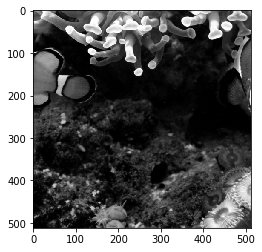

check fail
picture 24 fail
(512, 512)


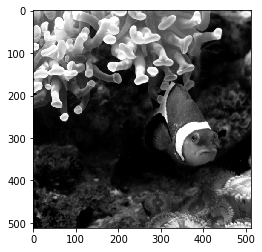

check fail
picture 24 fail
(512, 512)
(2040, 1140, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(1548, 2040, 3)
(512, 512)
(512, 512)
(1992, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1272, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1224, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(2040, 2040, 3)
(512, 512)
(512, 512)
(1140, 2040, 3)
(512, 512)


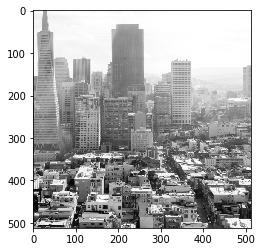

check fail
picture 45 fail
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1368, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1332, 2040, 3)
(512, 512)
(512, 512)
(1152, 2040, 3)
(512, 512)
(512, 512)
(1380, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(2040, 1644, 3)
(512, 512)
(512, 512)
(1224, 2040, 3)
(512, 512)
(512, 512)
(2040, 1284, 3)
(512, 512)
(512, 512)
(1428, 2040, 3)
(512, 512)
(512, 512)
(1584, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1188, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1320, 2040, 3)
(512, 512)
(512, 512)
(1380, 2040, 3)
(512, 512)
(512, 512)
(2040, 1248, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356,

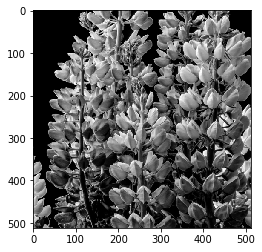

check fail
picture 88 fail
(512, 512)


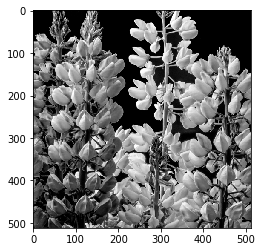

check fail
picture 88 fail
(512, 512)
(2040, 1536, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(1152, 2040, 3)
(512, 512)
(512, 512)
(1368, 2040, 3)
(512, 512)
(512, 512)
(1272, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1188, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1512, 2040, 3)


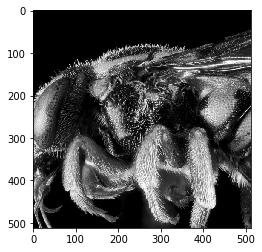

check fail
picture 101 fail
(512, 512)


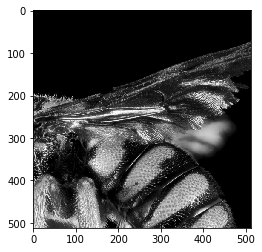

check fail
picture 101 fail
(512, 512)
(1368, 2040, 3)
(512, 512)
(512, 512)
(1140, 2040, 3)
(512, 512)
(512, 512)
(1320, 2040, 3)
(512, 512)
(512, 512)
(1296, 2040, 3)
(512, 512)
(512, 512)
(1152, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1368, 2040, 3)


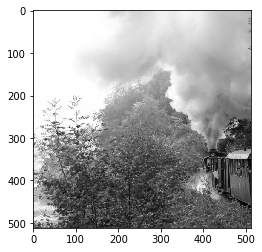

check fail
picture 113 fail
(512, 512)
(512, 512)
(2040, 1368, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)


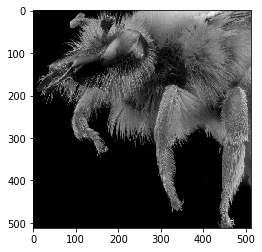

check fail
picture 115 fail
(512, 512)


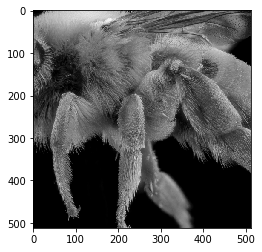

check fail
picture 115 fail
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1488, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(960, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)


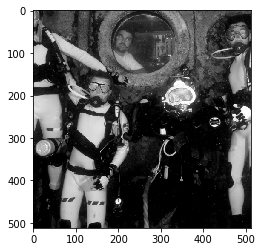

check fail
picture 123 fail
(512, 512)


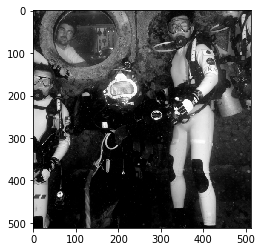

check fail
picture 123 fail
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1464, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1284, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1296, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(2040, 1776, 3)
(512, 512)
(512, 512)
(1344, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1332, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(948, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(732, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1656, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1752, 2040, 

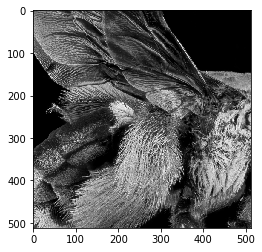

check fail
picture 176 fail
(512, 512)


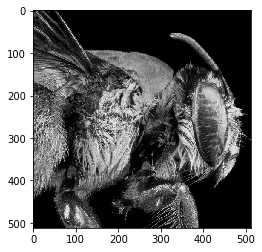

check fail
picture 176 fail
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(1248, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1152, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1548, 2040, 3)


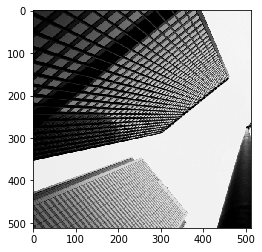

check fail
picture 188 fail
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1152, 2040, 3)
(512, 512)
(512, 512)
(1452, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1548, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1260, 2040, 3)
(512, 512)
(512, 512)
(852, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(

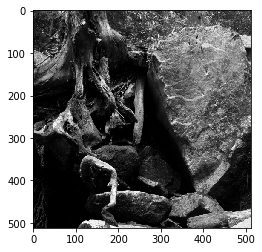

check fail
picture 231 fail
(512, 512)


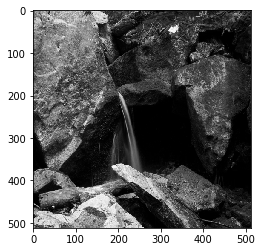

check fail
picture 231 fail
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1368, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1140, 2040, 3)
(512, 512)
(512, 512)
(2040, 1296, 3)
(512, 512)
(512, 512)
(1152, 2040, 3)
(512, 512)


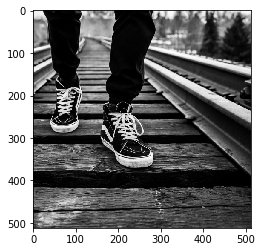

check fail
picture 239 fail
(512, 512)
(1836, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(780, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1296, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1332, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040,

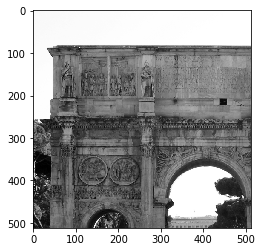

check fail
picture 271 fail
(512, 512)


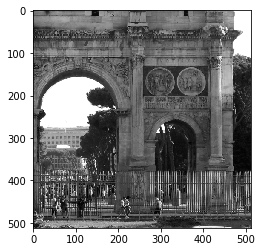

check fail
picture 271 fail
(512, 512)
(1188, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)


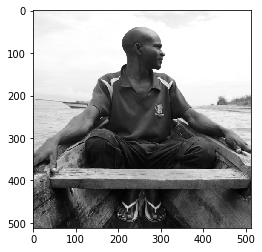

check fail
picture 275 fail
(512, 512)


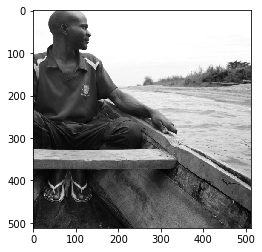

check fail
picture 275 fail
(512, 512)
(1356, 2040, 3)


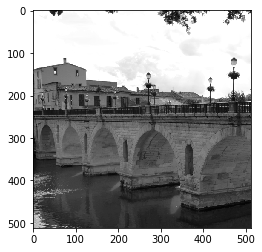

check fail
picture 276 fail
(512, 512)


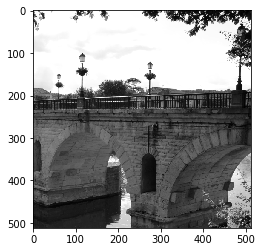

check fail
picture 276 fail
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)


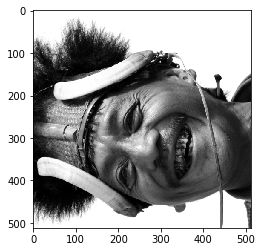

check fail
picture 278 fail
(512, 512)


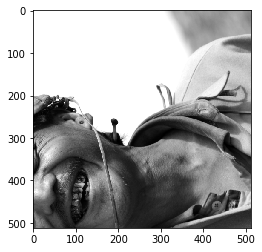

check fail
picture 278 fail
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1152, 2040, 3)
(512, 512)
(512, 512)
(1152, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(2040, 1236, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1260, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1152, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1344, 2040, 3)
(512, 512)
(512, 512)
(1224, 2040, 3)
(512, 512)
(512, 512)
(1392, 2040, 3)
(512, 512)
(512, 512)
(1320, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1224, 2040

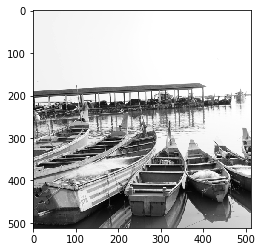

check fail
picture 401 fail
(512, 512)


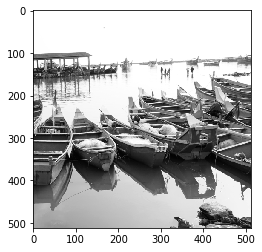

check fail
picture 401 fail
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1632, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1464, 2040, 3)
(512, 512)
(512, 512)
(1368, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1260, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1368, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)


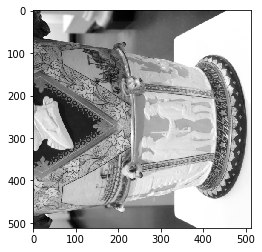

check fail
picture 414 fail
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(2040, 1536, 3)
(512, 512)
(512, 512)
(2040, 1524, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1164, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(1368, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1224, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(648, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1392, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040,

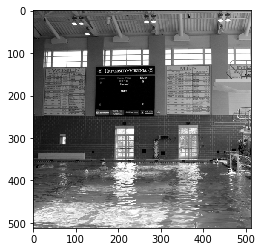

check fail
picture 466 fail
(512, 512)


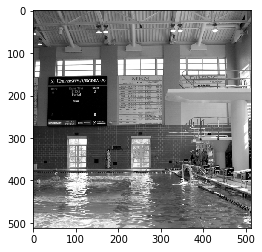

check fail
picture 466 fail
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1452, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1368, 2040, 3)
(512, 512)
(512, 512)
(1488, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1368, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040

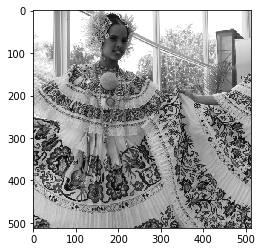

check fail
picture 501 fail
(512, 512)


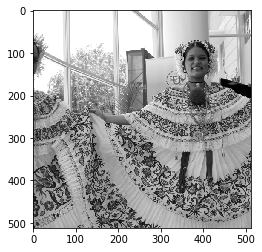

check fail
picture 501 fail
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1140, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(2040, 1368, 3)
(512, 512)


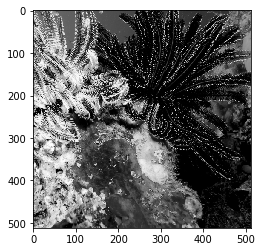

check fail
picture 508 fail
(512, 512)
(1368, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1152, 2040, 3)
(512, 512)
(512, 512)
(1452, 2040, 3)
(512, 512)
(512, 512)
(2040, 2040, 3)
(512, 512)
(512, 512)
(1368, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(960, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)


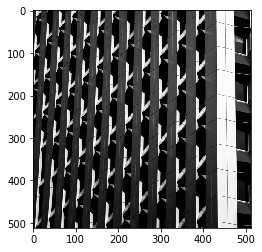

check fail
picture 520 fail
(512, 512)


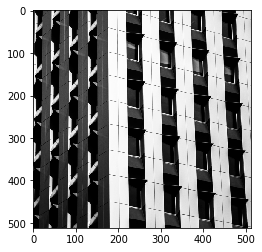

check fail
picture 520 fail
(512, 512)
(2040, 1368, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(888, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)


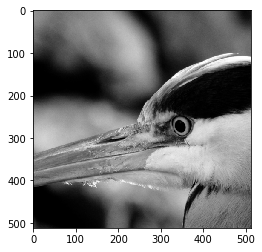

check fail
picture 525 fail
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1044, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1224, 2040, 3)
(512, 512)
(512, 512)
(1284, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1368, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1368, 2040, 3)
(512, 512)
(512, 512)
(1140, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)


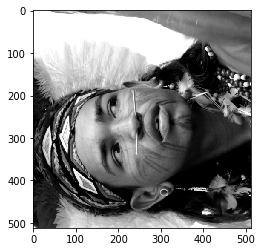

check fail
picture 543 fail
(512, 512)


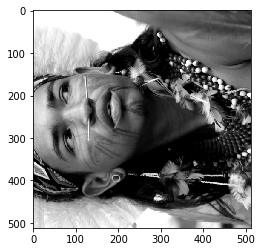

check fail
picture 543 fail
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(2040, 1992, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(1152, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)


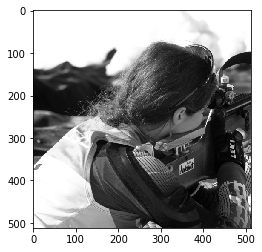

check fail
picture 548 fail
(512, 512)


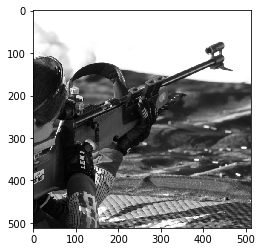

check fail
picture 548 fail
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1224, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1332, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1152, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(1092, 2040, 3)
(512, 512)
(512, 512)
(1176, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1608, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1368, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(2040, 1824, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1332, 2040

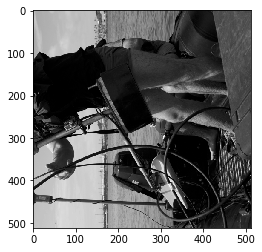

check fail
picture 590 fail
(512, 512)
(1212, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1428, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1428, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)


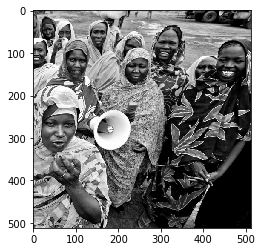

check fail
picture 607 fail
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1440, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1188, 2040, 3)
(512, 512)
(512, 512)
(1584, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)


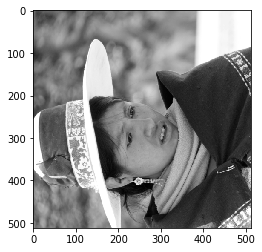

check fail
picture 615 fail
(512, 512)
(512, 512)
(1368, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1524, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1452, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(864, 2040, 3)
(512, 512)
(512, 512)
(2040, 1632, 3)
(512, 512)
(512, 512)
(1464, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1368, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(

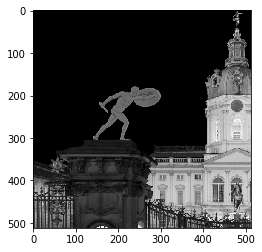

check fail
picture 650 fail
(512, 512)


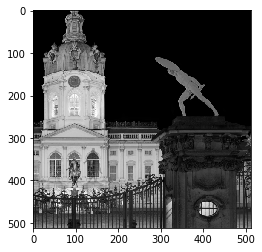

check fail
picture 650 fail
(512, 512)
(1224, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1584, 2040, 3)
(512, 512)
(512, 512)
(1344, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1320, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1296, 2040, 3)


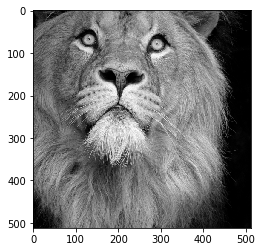

check fail
picture 661 fail
(512, 512)


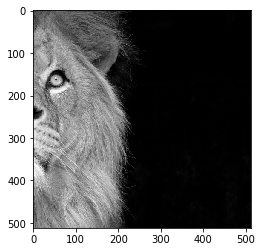

check fail
picture 661 fail
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1632, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(2040, 1476, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1308, 2040, 3)
(512, 512)
(512, 512)
(1152, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1344, 2040, 3)
(512, 512)
(512, 512)
(1380, 2040, 3)
(512, 512)
(512, 512)
(1452, 2040, 3)
(512, 512)
(512, 512)
(1464, 2040, 3)
(512, 512)
(512, 512)
(1212, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1368, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1080, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040

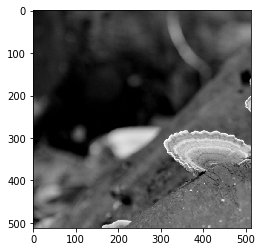

check fail
picture 688 fail
(512, 512)


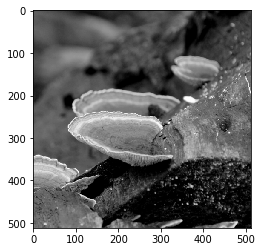

check fail
picture 688 fail
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(2040, 1968, 3)
(512, 512)
(512, 512)
(2040, 1572, 3)
(512, 512)
(512, 512)
(1728, 2040, 3)
(512, 512)
(512, 512)
(1344, 2040, 3)
(512, 512)
(512, 512)
(1320, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1368, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(936, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)


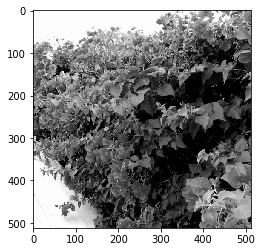

check fail
picture 711 fail
(512, 512)


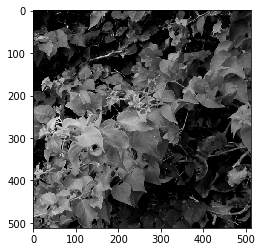

check fail
picture 711 fail
(512, 512)
(1788, 2040, 3)
(512, 512)
(512, 512)
(1344, 2040, 3)
(512, 512)
(512, 512)
(1524, 2040, 3)
(512, 512)
(512, 512)
(1332, 2040, 3)
(512, 512)
(512, 512)
(2040, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1152, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1368, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(1308, 2040, 3)
(512, 512)
(512, 512)
(2040, 1356, 3)
(512, 512)
(512, 512)
(1536, 2040, 3)
(512, 512)
(512, 512)
(1452, 2040, 3)
(512, 512)
(512, 512)
(1356, 2040

'\nimg = cv2.imread("../../DIV2K_train_HR/0001.png", cv2.IMREAD_GRAYSCALE)\nimg = cv2.resize(img, (512, 512))\nimg2 = cv2.imread("../../DIV2K_train_HR/0002.png", cv2.IMREAD_GRAYSCALE)\nimg2 = cv2.resize(img2, (512, 512))\n#print(SSIM(img, img2))\n'

In [23]:
"""
    Generating image
"""
import random

rotation = 180

#https://github.com/GeorgeSeif/Semantic-Segmentation-Suite/blob/master/train.py
def random_crop(image, crop_height, crop_width, j):
    if j == 0:
        x = random.randint(0, image.shape[1]-crop_width-256)
        y = random.randint(0, image.shape[0]-crop_height)
    else:
        x = random.randint(256, image.shape[1]-crop_width)
        y = random.randint(0, image.shape[0]-crop_height)
    
    if len(image.shape) == 3:
        return image[y:y+crop_height, x:x+crop_width, :]
    else:
        return image[y:y+crop_height, x:x+crop_width]

def data_augmentation(input_image):
    # Data augmentation
    input_image = random_crop(input_image, 512, 512)
    plt.imshow(input_image, cmap="gray")
    plt.show()
    if random.randint(0,1):
        input_image = cv2.flip(input_image, 1)
    if random.randint(0,1):
        input_image = cv2.flip(input_image, 0)
    print(input_image.shape[1])
        
    return input_image

#img pepper + salt < 5%
def checkRatio(img): 
    img = img.reshape((-1))
    if (np.sum(img == 255) + np.sum(img == 0)) > 512*512*0.05:
        plt.imshow(img.reshape((512, 512)), cmap="gray")
        plt.show()
        print("check fail")
        #print("pepper: ", np.sum(img == 0))
        #print("salt: ", np.sum(img == 255))
        return False
    return True

brightness = 0.3
def chaneBrightness(input_image):
    factor = 1.0 + random.uniform(-1.0*brightness, brightness)
    table = np.array([((i / 255.0) * factor) * 255 for i in np.arange(0, 256)]).astype(np.uint8)
    input_image = cv2.LUT(input_image, table)
    return input_image

def rotation(input_image):
    return np.rot90(input_image)


#cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) → dst

indexCount = 41
for i in range(6, 801):
    picture = f'{i:#04d}'
    img = cv2.imread("../../DIV2K_train_HR/" + picture + ".png")
    print(img.shape)
    if img.shape[1]//2 > 512 and img.shape[0]//2 > 512:
        img = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2) )
    #plt.imshow(img)
    #plt.show()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if img.shape[0] > img.shape[1]: 
        img = rotation(img)
    for j in range(2):
        img2 = random_crop(img, 512, 512, j)
        while checkRatio(img2) == False:
            print("picture " + str(i) + " fail")
            img2 = random_crop(img, 512, 512, j)
            #img2 = cv2.equalizeHist(img2)
            img2 = cv2.normalize(img2,None,1,254,cv2.NORM_MINMAX)
        
        img2 = img2.reshape((512, 512))
        print(img2.shape)
        #plt.imshow(img2, cmap="gray", vmin=0, vmax=255)
        #plt.show()
        cv2.imwrite('../../DIV2K_512x512/' + str(indexCount) + '.png', img2)
        indexCount += 1
        cv2.imwrite('../../DIV2K_512x512/' + str(indexCount) + '.png', cv2.flip(img2, 1))
        indexCount += 1
        cv2.imwrite('../../DIV2K_512x512/' + str(indexCount) + '.png', cv2.flip(img2, 0))
        indexCount += 1
        cv2.imwrite('../../DIV2K_512x512/' + str(indexCount) + '.png', cv2.flip(cv2.flip(img2, 1), 0))
        indexCount += 1

"""
img = cv2.imread("../../DIV2K_train_HR/0001.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (512, 512))
img2 = cv2.imread("../../DIV2K_train_HR/0002.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.resize(img2, (512, 512))
#print(SSIM(img, img2))
"""

    

In [11]:
img = cv2.imread("../../DIV2K_512x512/2.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (512, 512))
img2 = cv2.imread("../../DIV2K_512x512/6.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.resize(img2, (512, 512))
print(SSIM(img, img2))

0.11650268202350046


In [2]:
"""
    Adding noise to image
"""
import random 

# 50%, 60%, 70%, 80%, 90%
img_size = 512*512

for i in range(1, 6401):
    img = cv2.imread("../../DIV2K_512x512/" + str(i) + ".png", cv2.IMREAD_GRAYSCALE)
    
    ran_seq = random.sample([n for n in range(img_size)], np.int(img_size* 0.5)) 
    ran_seq2 = random.sample([n for n in range(img_size)], np.int(img_size* 0.6)) 
    ran_seq3 = random.sample([n for n in range(img_size)], np.int(img_size* 0.7))
    ran_seq4 = random.sample([n for n in range(img_size)], np.int(img_size* 0.8)) 
    ran_seq5 = random.sample([n for n in range(img_size)], np.int(img_size* 0.9)) 
    print(img.shape)
    X_50 = np.copy(img.reshape(img_size))
    X_60 = np.copy(X_50)
    X_70 = np.copy(X_50)
    X_80 = np.copy(X_50)
    X_90 = np.copy(X_50)
    for index in ran_seq:
        if random.randint(0,1):
            X_50[index] = 255
        else:
            X_50[index] = 0

    for index in ran_seq2:
        if random.randint(0,1):
            X_60[index] = 255
        else:
            X_60[index] = 0
            
    for index in ran_seq3:
        if random.randint(0,1):
            X_70[index] = 255
        else:
            X_70[index] = 0

    for index in ran_seq4:
        if random.randint(0,1):
            X_80[index] = 255
        else:
            X_80[index] = 0
            
    for index in ran_seq5:
        if random.randint(0,1):
            X_90[index] = 255
        else:
            X_90[index] = 0
            
    X_50 = X_50.reshape(512, 512)
    X_60 = X_60.reshape(512, 512)
    X_70 = X_70.reshape(512, 512)
    X_80 = X_80.reshape(512, 512)
    X_90 = X_90.reshape(512, 512)
    """
    plt.imshow(img, cmap="gray")
    plt.show()
    plt.imshow(X_50, cmap="gray")
    plt.show()
    plt.imshow(X_60, cmap="gray")
    plt.show()
    plt.imshow(X_70, cmap="gray")
    plt.show()
    plt.imshow(X_80, cmap="gray")
    plt.show()
    plt.imshow(X_90, cmap="gray")
    plt.show()
    """
    
    cv2.imwrite("../../DIV2K_noise/" + str(i) + '_noise50.png', X_50)
    cv2.imwrite("../../DIV2K_noise/" + str(i) + '_noise60.png', X_60)
    cv2.imwrite("../../DIV2K_noise/" + str(i) + '_noise70.png', X_70)
    cv2.imwrite("../../DIV2K_noise/" + str(i) + '_noise80.png', X_80)
    cv2.imwrite("../../DIV2K_noise/" + str(i) + '_noise90.png', X_90)
    if i % 100 == 0:
        print(i)
    

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
800
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
1500
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512,

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
2300
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512,

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
3000
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512,

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
3800
(512, 512)
(512,

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
4500
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512,

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
5200
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512,

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
6000
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512,

In [2]:
"""
    Peak Signal-to-Noise Ratio:
         > 40dB: great
        30~40dB: good
        20~30dB: bad
         < 20dB: worse
"""
def PSNR(y_true, y_pred):
    return -10. * np.log10(np.mean(np.square(y_pred - y_true)))

def SSIM(img1, img2):
    return compare_ssim(img1, img2)

def printHistory(history): 
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss 
    plt.plot(history.history['loss']) 
    plt.plot(history.history['val_loss']) 
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [3]:
"""
    basic CNN model
"""
def SRCNN(pretrained_weights=None):
    model = Sequential()

    model.add(Conv2D(64, (3, 3), activation='relu',input_shape=(512, 512, 1),padding="same"))
    model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(1, (3, 3), activation='relu', padding="same"))

    print(model.summary())

    model.compile(loss='mean_squared_error',
                  optimizer=Adam(),
                  metrics=['accuracy'])

    if(pretrained_weights):
            model.load_weights(pretrained_weights)

    return model

model = SRCNN()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 512, 512, 64)      640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 512, 512, 64)      36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 512, 512, 64)      36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 512, 512, 64)      36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 512, 512, 1)       577       
Total params: 112,001
Trainable params: 112,001
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
"""
    load training data
"""
import gc

dataY = np.zeros((800,512, 512))

for i in range(1, 801):
    picture = f'{i:#04d}'
    img = cv2.imread("../../div2k_train_gray/" + picture + ".png", cv2.IMREAD_GRAYSCALE)
    dataY[i-1] = img
    
dataY = dataY.reshape(-1, 512, 512, 1)
dataY = dataY.astype('float32') / 255

In [8]:
"""
    noise 50%
"""
X_50 = np.zeros((800,512, 512))
for i in range(1, 801):
    picture = f'{i:#04d}'
    img = cv2.imread("../../div2k_train_gray/" + picture + "_noise50.png", cv2.IMREAD_GRAYSCALE)
    X_50[i-1] = img

X_50 = X_50.reshape(-1, 512, 512, 1)
X_50 = X_50.astype('float32') / 255
                 
X_train_50, X_test_50, y_train, y_test = train_test_split(X_50, dataY, test_size=0.3, random_state=41)     

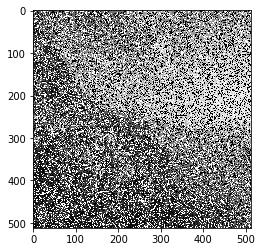

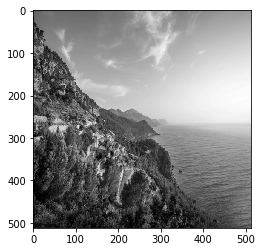

8.313762545585632
8.189356327056885
0.22357321503740102


In [6]:
X_train_50 = X_train_50.reshape(-1, 512, 512)
y_train = y_train.reshape(-1, 512, 512)
img = X_train_50[1]
plt.imshow(img, cmap="gray")
plt.show()
img = y_train[1]
plt.imshow(img, cmap="gray")
plt.show()
print(PSNR(y_train[1], X_train_50[1]) )
print(PSNR(y_train, X_train_50) )
print(SSIM(y_train, X_train_50))

In [9]:
modelCheck = ModelCheckpoint('SRCNN_50{epoch:04d}.h5', save_weights_only=True, save_best_only=True)
#keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
earlyStop = EarlyStopping(monitor='val_loss', patience=20)
history = History()

model.fit(X_train_50, y_train,
          batch_size=16,
          epochs=100,
          verbose=1,
          validation_data=(X_test_50, y_test),
          callbacks=[modelCheck, earlyStop, history])

Instructions for updating:
Use tf.cast instead.
Train on 560 samples, validate on 240 samples
Epoch 1/100
560/560 [==============================] - 38s 67ms/step - loss: 0.0341 - acc: 0.0000e+00 - val_loss: 0.0140 - val_acc: 0.0000e+00
Epoch 2/100
560/560 [==============================] - 29s 51ms/step - loss: 0.0126 - acc: 0.0000e+00 - val_loss: 0.0124 - val_acc: 0.0000e+00
Epoch 3/100
560/560 [==============================] - 29s 51ms/step - loss: 0.0114 - acc: 0.0000e+00 - val_loss: 0.0114 - val_acc: 0.0000e+00
Epoch 4/100
560/560 [==============================] - 29s 51ms/step - loss: 0.0107 - acc: 0.0000e+00 - val_loss: 0.0110 - val_acc: 0.0000e+00
Epoch 5/100
560/560 [==============================] - 29s 51ms/step - loss: 0.0102 - acc: 0.0000e+00 - val_loss: 0.0107 - val_acc: 0.0000e+00
Epoch 6/100
560/560 [==============================] - 29s 51ms/step - loss: 0.0097 - acc: 0.0000e+00 - val_loss: 0.0099 - val_acc: 0.0000e+00
Epoch 7/100
560/560 [===========================

Epoch 56/100
560/560 [==============================] - 29s 51ms/step - loss: 0.0013 - acc: 0.0000e+00 - val_loss: 0.0015 - val_acc: 0.0000e+00
Epoch 57/100
560/560 [==============================] - 29s 51ms/step - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 58/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0012 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 59/100
560/560 [==============================] - 30s 53ms/step - loss: 0.0013 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 60/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0012 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 61/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0012 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 62/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0011 - acc: 0.0000e+00 - val_loss: 0.0013 - val_acc: 0.0

== SRCNN_50 accuracy ==
Train loss: 0.0009526696721357959
Train accuracy: 0.0
Test loss: 0.001052753192683061
Test accuracy: 0.0


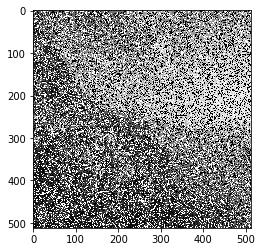

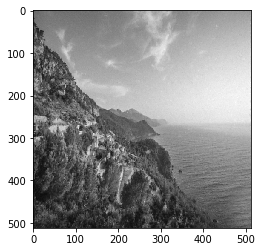

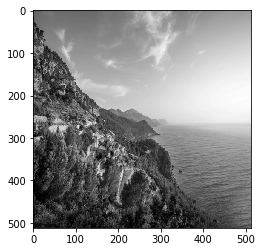

32.65650987625122
30.2105712890625
0.9868783201500011
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


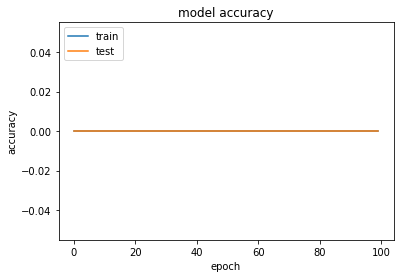

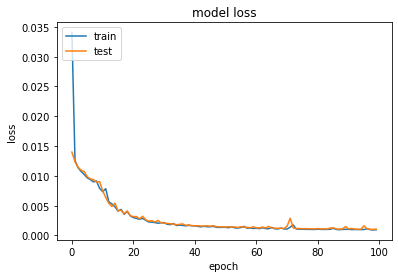

In [10]:
print("== SRCNN_50 accuracy ==")
score = model.evaluate(X_train_50, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test_50, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

result = model.predict(X_train_50)
result = result.reshape(-1, 512, 512)
X_train_50 = X_train_50.reshape(-1, 512, 512)
y_train = y_train.reshape(-1, 512, 512)
img = X_train_50[1]
plt.imshow(img, cmap="gray")
plt.show()
# show the image
img = result[1]
plt.imshow(img, cmap="gray")
plt.show()
img = y_train[1]
plt.imshow(img, cmap="gray")
plt.show()
print(PSNR(y_train[1], result[1]) )
print(PSNR(y_train, result) )
print(SSIM(y_train, result))
printHistory(history)

In [8]:
del X_50
gc.collect()

70

In [20]:
"""
    noise 60%
"""
X_60 = np.zeros((800,512, 512))
for i in range(1, 801):
    picture = f'{i:#04d}'
    img = cv2.imread("../../div2k_train_gray/" + picture + "_noise60.png", cv2.IMREAD_GRAYSCALE)
    X_60[i-1] = img

X_60 = X_60.reshape(-1, 512, 512, 1)
X_60 = X_60.astype('float32') / 255

X_train_60, X_test_60, y_train, y_test = train_test_split(X_60, dataY, test_size=0.3, random_state=41)    

In [21]:
modelCheck = ModelCheckpoint('SRCNN_60{epoch:04d}.h5', save_weights_only=True, save_best_only=True)
#keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
earlyStop = EarlyStopping(monitor='val_loss', patience=20)
history = History()

model.fit(X_train_60, y_train,
          batch_size=16,
          epochs=100,
          verbose=1,
          validation_data=(X_test_60, y_test),
          callbacks=[modelCheck, earlyStop, history])

Train on 560 samples, validate on 240 samples
Epoch 1/100
560/560 [==============================] - 29s 51ms/step - loss: 0.0059 - acc: 0.0000e+00 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 2/100
560/560 [==============================] - 29s 51ms/step - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 3/100
560/560 [==============================] - 29s 51ms/step - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 4/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0023 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 5/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 6/100
560/560 [==============================] - 29s 51ms/step - loss: 0.0022 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 7/100
560/560 [==============================] - 29s 51ms/step - loss: 0.0021 - acc: 0.000

560/560 [==============================] - 29s 52ms/step - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 58/100
560/560 [==============================] - 29s 51ms/step - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 59/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0016 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 60/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 61/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 0.0016 - val_acc: 0.0000e+00
Epoch 62/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 63/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0015 - acc: 0.0000e+00 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch

== SRCNN_60 accuracy ==
Train loss: 0.0013466905137257917
Train accuracy: 0.0
Test loss: 0.001491840478653709
Test accuracy: 0.0


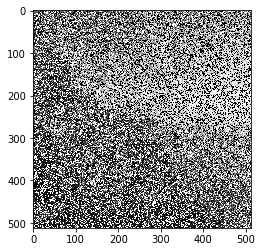

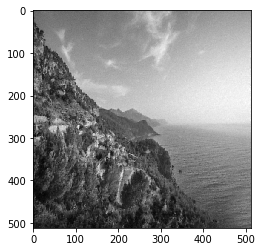

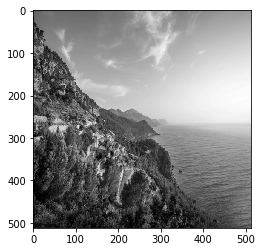

31.455109119415283
28.707311153411865
0.981061355936781
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


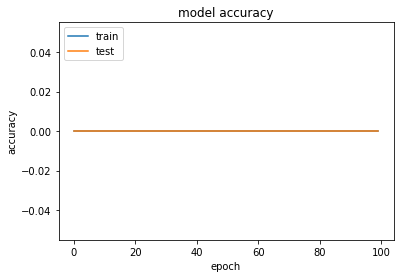

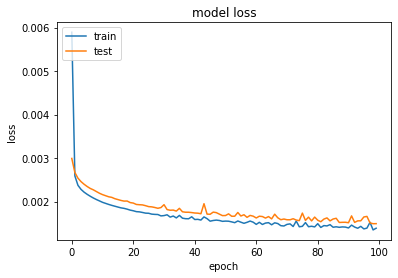

In [22]:
print("== SRCNN_60 accuracy ==")
score = model.evaluate(X_train_60, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test_60, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

result = model.predict(X_train_60)
result = result.reshape(-1, 512, 512)
X_train_60 = X_train_60.reshape(-1, 512, 512)
y_train = y_train.reshape(-1, 512, 512)
img = X_train_60[1]
plt.imshow(img, cmap="gray")
plt.show()
# show the image
img = result[1]
plt.imshow(img, cmap="gray")
plt.show()
img = y_train[1]
plt.imshow(img, cmap="gray")
plt.show()
print(PSNR(y_train[1], result[1]) )
print(PSNR(y_train, result) )
print(SSIM(y_train, result))
printHistory(history)

In [ ]:
del X_60
gc.collect()

In [11]:
"""
    noise 70%
"""
X_70 = np.zeros((800,512, 512))
for i in range(1, 801):
    picture = f'{i:#04d}'
    img = cv2.imread("../../div2k_train_gray/" + picture + "_noise70.png", cv2.IMREAD_GRAYSCALE)
    X_70[i-1] = img

X_70 = X_70.reshape(-1, 512, 512, 1)
X_70 = X_70.astype('float32') / 255

X_train_70, X_test_70, y_train, y_test = train_test_split(X_70, dataY, test_size=0.3, random_state=41)    

In [12]:
modelCheck = ModelCheckpoint('SRCNN_70{epoch:04d}.h5', save_weights_only=True, save_best_only=True)
#keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
earlyStop = EarlyStopping(monitor='val_loss', patience=20)
history = History()

model.fit(X_train_70, y_train,
          batch_size=16,
          epochs=100,
          verbose=1,
          validation_data=(X_test_70, y_test),
          callbacks=[modelCheck, earlyStop, history])

Train on 560 samples, validate on 240 samples
Epoch 1/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0347 - acc: 0.0000e+00 - val_loss: 0.0146 - val_acc: 0.0000e+00
Epoch 2/100
560/560 [==============================] - 29s 51ms/step - loss: 0.0117 - acc: 0.0000e+00 - val_loss: 0.0085 - val_acc: 0.0000e+00
Epoch 3/100
560/560 [==============================] - 29s 51ms/step - loss: 0.0075 - acc: 0.0000e+00 - val_loss: 0.0075 - val_acc: 0.0000e+00
Epoch 4/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0064 - acc: 0.0000e+00 - val_loss: 0.0070 - val_acc: 0.0000e+00
Epoch 5/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0060 - acc: 0.0000e+00 - val_loss: 0.0068 - val_acc: 0.0000e+00
Epoch 6/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0056 - acc: 0.0000e+00 - val_loss: 0.0053 - val_acc: 0.0000e+00
Epoch 7/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0058 - acc: 0.000

560/560 [==============================] - 29s 52ms/step - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 58/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 59/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch 60/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0026 - val_acc: 0.0000e+00
Epoch 61/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0025 - val_acc: 0.0000e+00
Epoch 62/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0026 - acc: 0.0000e+00 - val_loss: 0.0029 - val_acc: 0.0000e+00
Epoch 63/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0024 - acc: 0.0000e+00 - val_loss: 0.0027 - val_acc: 0.0000e+00
Epoch

== SRCNN_70 accuracy ==
Train loss: 0.0021226798583354268
Train accuracy: 0.0
Test loss: 0.0023472818235556283
Test accuracy: 0.0


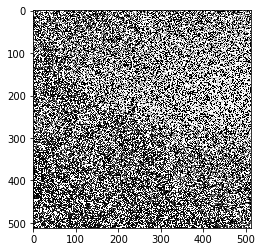

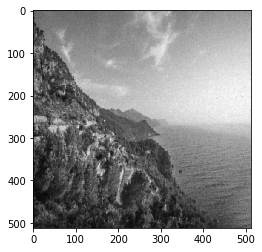

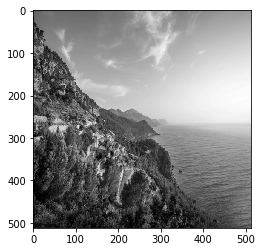

29.59446430206299
26.73114776611328
0.970100465733656
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


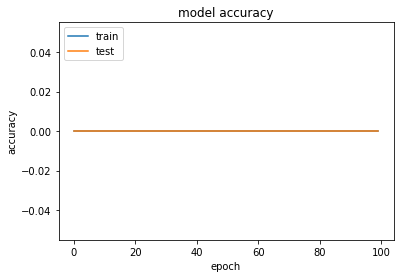

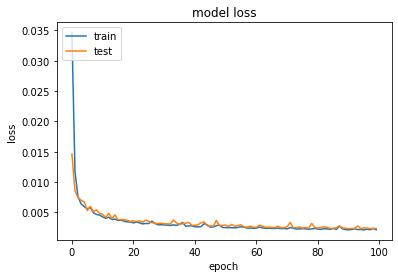

In [13]:
print("== SRCNN_70 accuracy ==")
score = model.evaluate(X_train_70, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test_70, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

result = model.predict(X_train_70)
result = result.reshape(-1, 512, 512)
X_train_70 = X_train_70.reshape(-1, 512, 512)
y_train = y_train.reshape(-1, 512, 512)
img = X_train_70[1]
plt.imshow(img, cmap="gray")
plt.show()
# show the image
img = result[1]
plt.imshow(img, cmap="gray")
plt.show()
img = y_train[1]
plt.imshow(img, cmap="gray")
plt.show()
print(PSNR(y_train[1], result[1]) )
print(PSNR(y_train, result) )
print(SSIM(y_train, result))
printHistory(history)

In [ ]:
del X_70
gc.collect()

In [14]:
"""
    noise 80%
"""
X_80 = np.zeros((800,512, 512))
for i in range(1, 801):
    picture = f'{i:#04d}'
    img = cv2.imread("../../div2k_train_gray/" + picture + "_noise80.png", cv2.IMREAD_GRAYSCALE)
    X_80[i-1] = img

X_80 = X_80.reshape(-1, 512, 512, 1)
X_80 = X_80.astype('float32') / 255

X_train_80, X_test_80, y_train, y_test = train_test_split(X_80, dataY, test_size=0.3, random_state=41)  

In [15]:
modelCheck = ModelCheckpoint('SRCNN_80{epoch:04d}.h5', save_weights_only=True, save_best_only=True)
#keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
earlyStop = EarlyStopping(monitor='val_loss', patience=20)
history = History()

model.fit(X_train_80, y_train,
          batch_size=16,
          epochs=100,
          verbose=1,
          validation_data=(X_test_80, y_test),
          callbacks=[modelCheck, earlyStop, history])

Train on 560 samples, validate on 240 samples
Epoch 1/100
560/560 [==============================] - 32s 57ms/step - loss: 0.0323 - acc: 0.0000e+00 - val_loss: 0.0427 - val_acc: 0.0000e+00
Epoch 2/100
560/560 [==============================] - 30s 54ms/step - loss: 0.0177 - acc: 0.0000e+00 - val_loss: 0.0120 - val_acc: 0.0000e+00
Epoch 3/100
560/560 [==============================] - 30s 54ms/step - loss: 0.0098 - acc: 0.0000e+00 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 4/100
560/560 [==============================] - 30s 54ms/step - loss: 0.0084 - acc: 0.0000e+00 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 5/100
560/560 [==============================] - 30s 54ms/step - loss: 0.0081 - acc: 0.0000e+00 - val_loss: 0.0082 - val_acc: 0.0000e+00
Epoch 6/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0079 - acc: 0.0000e+00 - val_loss: 0.0113 - val_acc: 0.0000e+00
Epoch 7/100
560/560 [==============================] - 29s 53ms/step - loss: 0.0088 - acc: 0.000

560/560 [==============================] - 30s 54ms/step - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0035 - val_acc: 0.0000e+00
Epoch 58/100
560/560 [==============================] - 30s 53ms/step - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 59/100
560/560 [==============================] - 30s 53ms/step - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0033 - val_acc: 0.0000e+00
Epoch 60/100
560/560 [==============================] - 30s 54ms/step - loss: 0.0033 - acc: 0.0000e+00 - val_loss: 0.0037 - val_acc: 0.0000e+00
Epoch 61/100
560/560 [==============================] - 30s 54ms/step - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 62/100
560/560 [==============================] - 30s 53ms/step - loss: 0.0035 - acc: 0.0000e+00 - val_loss: 0.0036 - val_acc: 0.0000e+00
Epoch 63/100
560/560 [==============================] - 29s 51ms/step - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0033 - val_acc: 0.0000e+00
Epoch

== SRCNN_80 accuracy ==
Train loss: 0.0030165510584733318
Train accuracy: 0.0
Test loss: 0.00331576323757569
Test accuracy: 0.0


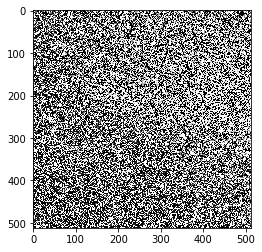

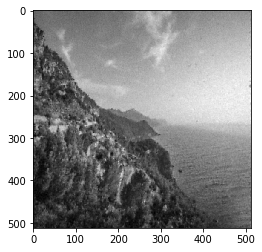

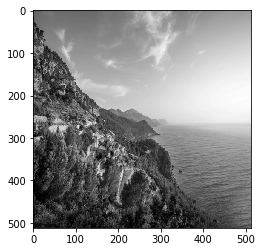

27.974798679351807
25.2048921585083
0.9577739173563519
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


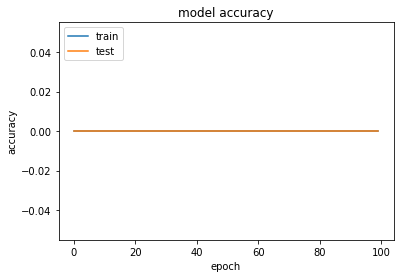

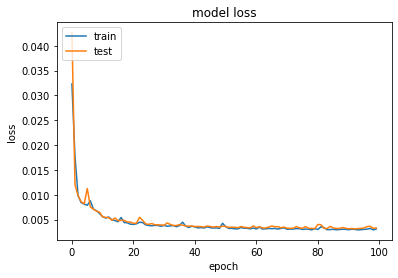

In [16]:
print("== SRCNN_80 accuracy ==")
score = model.evaluate(X_train_80, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test_80, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

result = model.predict(X_train_80)
result = result.reshape(-1, 512, 512)
X_train_80 = X_train_80.reshape(-1, 512, 512)
y_train = y_train.reshape(-1, 512, 512)
img = X_train_80[1]
plt.imshow(img, cmap="gray")
plt.show()
# show the image
img = result[1]
plt.imshow(img, cmap="gray")
plt.show()
img = y_train[1]
plt.imshow(img, cmap="gray")
plt.show()
print(PSNR(y_train[1], result[1]) )
print(PSNR(y_train, result) )
print(SSIM(y_train, result))
printHistory(history)

In [ ]:
del X_80
gc.collect()

In [17]:
"""
    noise 90%
"""
X_90 = np.zeros((800,512, 512))
for i in range(1, 801):
    picture = f'{i:#04d}'
    img = cv2.imread("../../div2k_train_gray/" + picture + "_noise90.png", cv2.IMREAD_GRAYSCALE)
    X_90[i-1] = img

X_90 = X_90.reshape(-1, 512, 512, 1)
X_90 = X_90.astype('float32') / 255

X_train_90, X_test_90, y_train, y_test = train_test_split(X_90, dataY, test_size=0.3, random_state=41)  

In [18]:
modelCheck = ModelCheckpoint('SRCNN_90{epoch:04d}.h5', save_weights_only=True, save_best_only=True)
#keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
earlyStop = EarlyStopping(monitor='val_loss', patience=20)
history = History()

model.fit(X_train_90, y_train,
          batch_size=16,
          epochs=100,
          verbose=1,
          validation_data=(X_test_90, y_test),
          callbacks=[modelCheck, earlyStop, history])

Train on 560 samples, validate on 240 samples
Epoch 1/100
560/560 [==============================] - 28s 51ms/step - loss: 0.0625 - acc: 0.0000e+00 - val_loss: 0.0466 - val_acc: 0.0000e+00
Epoch 2/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0410 - acc: 0.0000e+00 - val_loss: 0.0396 - val_acc: 0.0000e+00
Epoch 3/100
560/560 [==============================] - 29s 53ms/step - loss: 0.0346 - acc: 0.0000e+00 - val_loss: 0.0357 - val_acc: 0.0000e+00
Epoch 4/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0263 - acc: 0.0000e+00 - val_loss: 0.0234 - val_acc: 0.0000e+00
Epoch 5/100
560/560 [==============================] - 29s 52ms/step - loss: 0.0257 - acc: 0.0000e+00 - val_loss: 0.0238 - val_acc: 0.0000e+00
Epoch 6/100
560/560 [==============================] - 30s 53ms/step - loss: 0.0192 - acc: 0.0000e+00 - val_loss: 0.0189 - val_acc: 0.0000e+00
Epoch 7/100
560/560 [==============================] - 30s 53ms/step - loss: 0.0187 - acc: 0.000

560/560 [==============================] - 30s 53ms/step - loss: 0.0060 - acc: 0.0000e+00 - val_loss: 0.0071 - val_acc: 0.0000e+00
Epoch 58/100
560/560 [==============================] - 30s 54ms/step - loss: 0.0059 - acc: 0.0000e+00 - val_loss: 0.0061 - val_acc: 0.0000e+00
Epoch 59/100
560/560 [==============================] - 30s 54ms/step - loss: 0.0057 - acc: 0.0000e+00 - val_loss: 0.0063 - val_acc: 0.0000e+00
Epoch 60/100
560/560 [==============================] - 30s 54ms/step - loss: 0.0058 - acc: 0.0000e+00 - val_loss: 0.0063 - val_acc: 0.0000e+00
Epoch 61/100
560/560 [==============================] - 30s 54ms/step - loss: 0.0058 - acc: 0.0000e+00 - val_loss: 0.0061 - val_acc: 0.0000e+00
Epoch 62/100
560/560 [==============================] - 30s 53ms/step - loss: 0.0060 - acc: 0.0000e+00 - val_loss: 0.0059 - val_acc: 0.0000e+00
Epoch 63/100
560/560 [==============================] - 29s 53ms/step - loss: 0.0061 - acc: 0.0000e+00 - val_loss: 0.0061 - val_acc: 0.0000e+00
Epoch

== SRCNN_90 accuracy ==
Train loss: 0.004967689647206238
Train accuracy: 0.0
Test loss: 0.005404807037363449
Test accuracy: 0.0


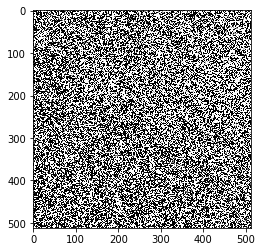

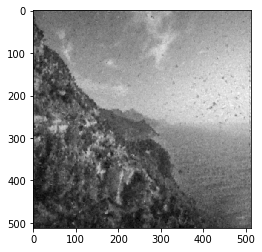

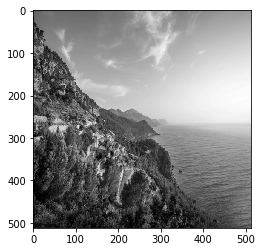

26.032660007476807
23.038458824157715
0.929149267859012
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


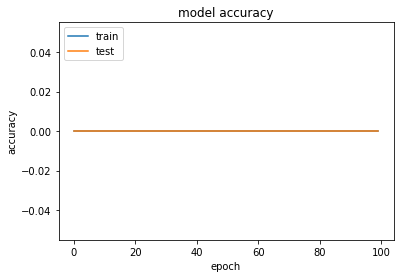

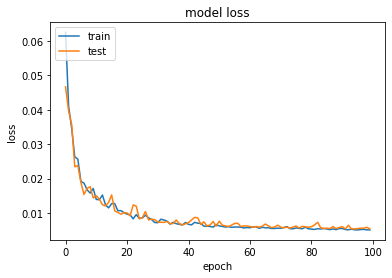

In [19]:
print("== SRCNN_90 accuracy ==")
score = model.evaluate(X_train_90, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test_90, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

result = model.predict(X_train_90)
result = result.reshape(-1, 512, 512)
X_train_90 = X_train_90.reshape(-1, 512, 512)
y_train = y_train.reshape(-1, 512, 512)
img = X_train_90[1]
plt.imshow(img, cmap="gray")
plt.show()
# show the image
img = result[1]
plt.imshow(img, cmap="gray")
plt.show()
img = y_train[1]
plt.imshow(img, cmap="gray")
plt.show()
print(PSNR(y_train[1], result[1]) )
print(PSNR(y_train, result) )
print(SSIM(y_train, result))
printHistory(history)